In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [5]:
print(df['text'][5])

Subject: ehronline web address change
this message is intended for ehronline users only .
due to a recent change to ehronline , the url ( aka " web address " ) for accessing ehronline needs to be changed on your computer . the change involves adding the letter " s " to the " http " reference in the url . the url for accessing ehronline should be : https : / / ehronline . enron . com .
this change should be made by those who have added the url as a favorite on the browser .


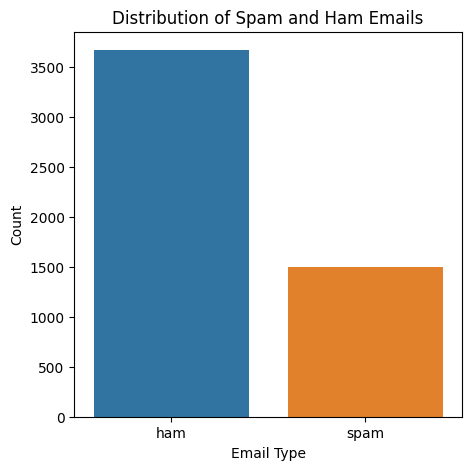

In [6]:
# Distribution of Spam and Ham
plt.figure(figsize=(5, 5))
sns.countplot(x='label', data=df, hue='label')
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

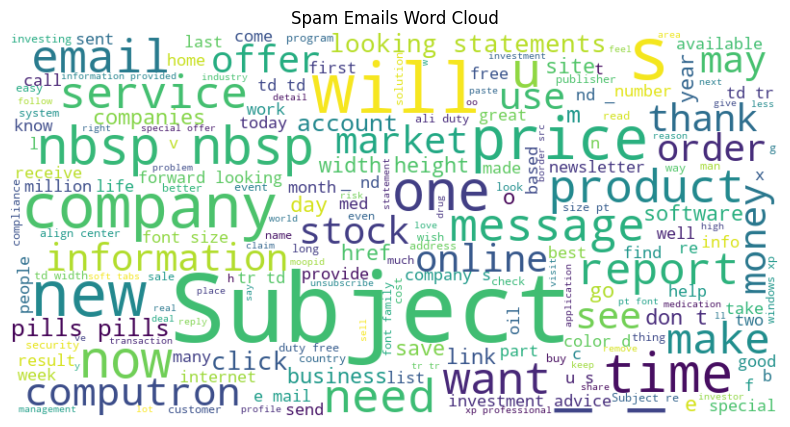

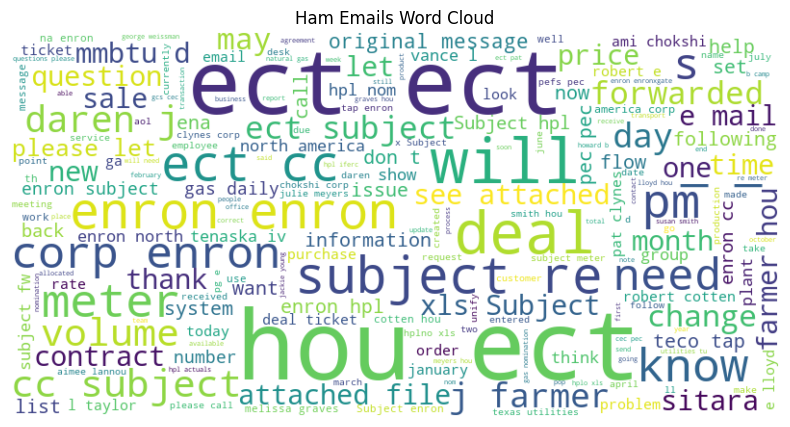

In [7]:
from wordcloud import WordCloud

# Function to create word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for Spam and Ham emails
spam_text = ' '.join(df[df['label'] == 'spam']['text'])
ham_text = ' '.join(df[df['label'] == 'ham']['text'])

create_wordcloud(spam_text, 'Spam Emails Word Cloud')
create_wordcloud(ham_text, 'Ham Emails Word Cloud')

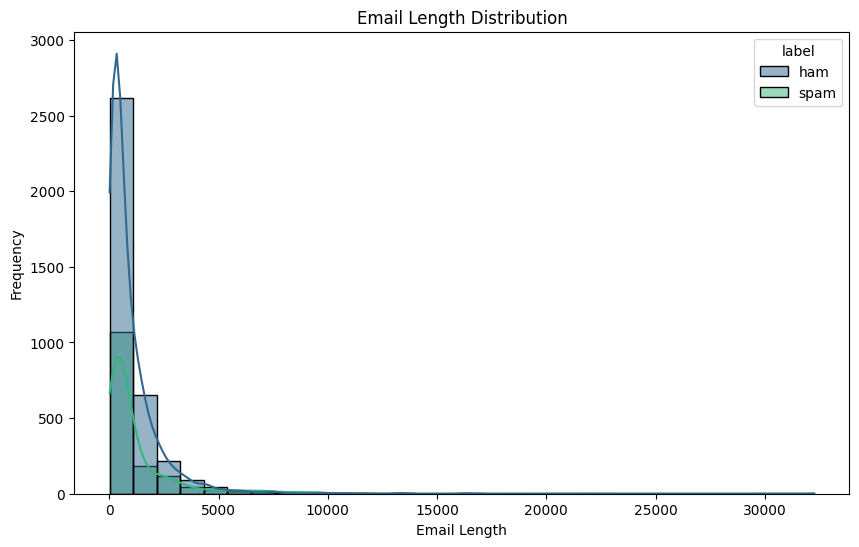

In [8]:
# Add a column for email length
df['email_length'] = df['text'].apply(len)

# Plot the email length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='email_length', hue='label', bins=30, palette='viridis', kde=True)
plt.title('Email Length Distribution')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.show()

In [9]:
df[df['label_num'] == 1].describe() # Spam emails

,Unnamed: 0,label_num,email_length
count,1499.00000,1499.0,1499.000000
mean,4421.00000,1.0,1223.256171
std,432.86834,0.0,1825.986210
min,3672.00000,1.0,11.000000
25%,4046.50000,1.0,283.000000
50%,4421.00000,1.0,576.000000
75%,4795.50000,1.0,1253.500000
max,5170.00000,1.0,22073.000000


In [10]:
df[df['label_num'] == 0].describe() # Ham emails

,Unnamed: 0,label_num,email_length
count,3672.000000,3672.0,3672.000000
mean,1835.500000,0.0,977.008170
std,1060.159422,0.0,1382.827493
min,0.000000,0.0,18.000000
25%,917.750000,0.0,231.750000
50%,1835.500000,0.0,530.000000
75%,2753.250000,0.0,1227.250000
max,3671.000000,0.0,32258.000000
